<a href="https://colab.research.google.com/github/aymanshams07/yanited_analytics/blob/main/Current_player_injury_man_united.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file using Colab's file upload interface
uploaded = files.upload()

# Load the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])  # Get the first uploaded file

# Check the first few rows of the data
print(df.head())

Saving dataset.csv to dataset.csv
            p_id2  start_year  season_days_injured  total_days_injured  \
0   aaronconnolly        2019                   13                 161   
1   aaronconnolly        2020                   71                 161   
2  aaroncresswell        2016                   95                 226   
3  aaroncresswell        2018                   87                 226   
4  aaroncresswell        2019                   35                 226   

   season_minutes_played  season_games_played  season_matches_in_squad  \
0                 1312.0                   24                       28   
1                  836.0                   17                       28   
2                 2247.0                   26                       27   
3                 1680.0                   20                       27   
4                 2870.0                   31                       31   

   total_minutes_played  total_games_played         dob  ...  \
0           

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've uploaded the file using the upload method above
# Load the dataset (replace 'your_file.csv' with your uploaded file name)
df = pd.read_csv('/content/dataset.csv')  # Ensure the filename matches exactly

# Inspect the first few rows of the data
print(df.head())

In [ ]:
print(df.columns)

Index(['p_id2', 'start_year', 'season_days_injured', 'total_days_injured',
       'season_minutes_played', 'season_games_played',
       'season_matches_in_squad', 'total_minutes_played', 'total_games_played',
       'dob', 'height_cm', 'weight_kg', 'nationality', 'work_rate', 'pace',
       'physic', 'fifa_rating', 'position', 'age', 'cumulative_minutes_played',
       'cumulative_games_played', 'minutes_per_game_prev_seasons',
       'avg_days_injured_prev_seasons', 'avg_games_per_season_prev_seasons',
       'bmi', 'work_rate_numeric', 'position_numeric',
       'significant_injury_prev_season', 'cumulative_days_injured',
       'season_days_injured_prev_season'],
      dtype='object')


In [ ]:
# filter for luke shaw
luke_shaw_df = df[df['p_id2'] == 'lukeshaw'].reset_index(drop=True)
luke_shaw_df

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
0,lukeshaw,2016,176,402,719.0,11,15,8918.0,107,1995-07-12,...,NaN,NaN,NaN,NaN,22.395413,3.5,1.0,NaN,NaN,NaN
1,lukeshaw,2018,53,402,2732.0,29,29,8918.0,107,1995-07-12,...,11.0,65.363636,176.000000,11.000000,22.395413,3.5,1.0,1.0,402.0,176.0
2,lukeshaw,2019,84,402,1829.0,24,24,8918.0,107,1995-07-12,...,40.0,86.275000,114.500000,20.000000,22.395413,3.5,1.0,0.0,804.0,53.0
3,lukeshaw,2020,89,402,2800.0,32,34,8918.0,107,1995-07-12,...,64.0,82.500000,104.333333,21.333333,22.395413,3.5,1.0,0.0,1206.0,84.0


In [ ]:
# filter for defenders for comparison
defenders_df = df[df['position_numeric'] == 1]
defenders_df

,p_id2,start_year,season_days_injured,total_days_injured,season_minutes_played,season_games_played,season_matches_in_squad,total_minutes_played,total_games_played,dob,...,cumulative_games_played,minutes_per_game_prev_seasons,avg_days_injured_prev_seasons,avg_games_per_season_prev_seasons,bmi,work_rate_numeric,position_numeric,significant_injury_prev_season,cumulative_days_injured,season_days_injured_prev_season
2,aaroncresswell,2016,95,226,2247.0,26,27,13368.0,149,1989-12-15,...,NaN,NaN,NaN,NaN,22.396079,3.5,1.0,NaN,NaN,NaN
3,aaroncresswell,2018,87,226,1680.0,20,27,13368.0,149,1989-12-15,...,26.0,86.423077,95.000000,26.000000,22.396079,3.5,1.0,0.0,226.0,95.0
4,aaroncresswell,2019,35,226,2870.0,31,31,13368.0,149,1989-12-15,...,46.0,85.369565,91.000000,23.000000,22.396079,3.5,1.0,0.0,452.0,87.0
5,aaroncresswell,2020,9,226,3342.0,36,36,13368.0,149,1989-12-15,...,77.0,88.272727,72.333333,25.666667,22.396079,3.5,1.0,0.0,678.0,35.0
26,adamsmith,2017,49,270,2194.0,27,28,9828.0,112,1991-04-29,...,NaN,NaN,NaN,NaN,24.382716,3.5,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,yanvalery,2019,102,123,808.0,11,21,2773.0,37,1999-02-22,...,23.0,80.391304,8.000000,23.000000,22.762346,4.0,1.0,0.0,123.0,8.0
1289,yanvalery,2020,13,123,116.0,3,9,2773.0,37,1999-02-22,...,34.0,78.147059,55.000000,17.000000,22.762346,4.0,1.0,0.0,246.0,102.0
1290,yerrymina,2018,158,427,947.0,13,19,5412.0,66,1994-09-23,...,NaN,NaN,NaN,NaN,23.592231,3.0,1.0,NaN,NaN,NaN
1291,yerrymina,2019,54,427,2421.0,29,31,5412.0,66,1994-09-23,...,13.0,72.846154,158.000000,13.000000,23.592231,3.0,1.0,1.0,427.0,158.0


In [ ]:
# Check the unique values in 'position_numeric' and their corresponding 'position' values
position_mapping = df[['position_numeric', 'position']].drop_duplicates().sort_values('position_numeric')
print(position_mapping)

     position_numeric    position
11                0.0  Goalkeeper
2                 1.0    Defender
0                 2.0     Forward
6                 3.0  Midfielder
267               NaN         NaN


In [ ]:
print(df['position_numeric'])

0       2.0
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
1296    2.0
1297    3.0
1298    0.0
1299    2.0
1300    2.0
Name: position_numeric, Length: 1301, dtype: float64


In [ ]:
!pip install xgboost

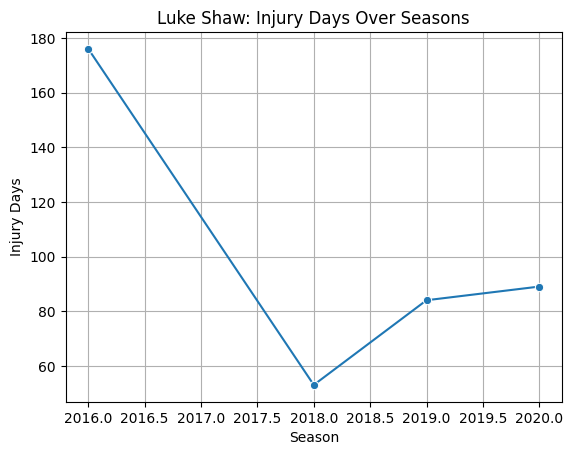

In [ ]:
# 1. Injury over seasons
if 'start_year' in df.columns and not luke_shaw_df.empty:
    sns.lineplot(data=luke_shaw_df, x='start_year', y='season_days_injured', marker='o')
    plt.title('Luke Shaw: Injury Days Over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Injury Days')
    plt.grid(True)
    plt.show()

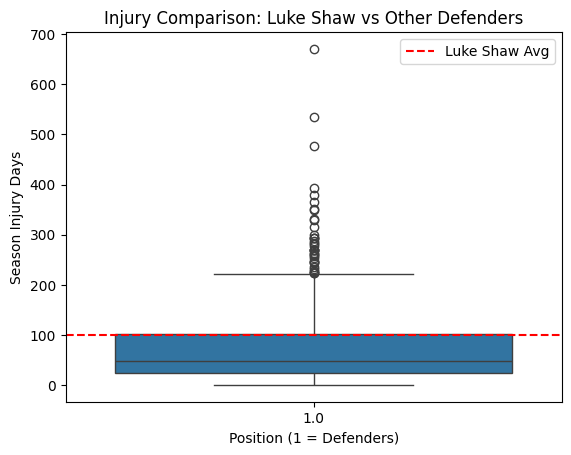

In [ ]:
# 2. Compare Shaw to other defenders
sns.boxplot(data=defenders_df, x='position_numeric', y='season_days_injured')
plt.axhline(y=luke_shaw_df['season_days_injured'].mean(), color='red', linestyle='--', label='Luke Shaw Avg')
plt.title('Injury Comparison: Luke Shaw vs Other Defenders')
plt.xlabel('Position (1 = Defenders)')
plt.ylabel('Season Injury Days')
plt.legend()
plt.show()

## Identify unique defenders

### Subtask:
Get a list of unique player IDs (`p_id2`) for all defenders in the `defenders_df`.


**Reasoning**:
Extract the unique player IDs for defenders from the `defenders_df` and store them in a list.



In [ ]:
unique_defenders = defenders_df['p_id2'].unique().tolist()

**Reasoning**:
Filter the main dataframe `df` to include only the rows where the 'p_id2' is in the `unique_defenders` list to create a dataframe containing the data for all unique defenders.



In [ ]:
defender_trends_df = df[df['p_id2'].isin(unique_defenders)].copy()

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=defender_trends_df, x='start_year', y='season_days_injured', hue='p_id2')
plt.title('Injury Trends for All Defenders Over Seasons')
plt.xlabel('Season')
plt.ylabel('Injury Days')
plt.grid(True)
plt.legend(title='Defender ID') # Add legend with a title
plt.show()

In [ ]:
unique_defender_ids = defenders_df['p_id2'].unique().tolist()

In [ ]:
random_defenders_df = df[df['p_id2'].isin(random_defender_ids)].copy()

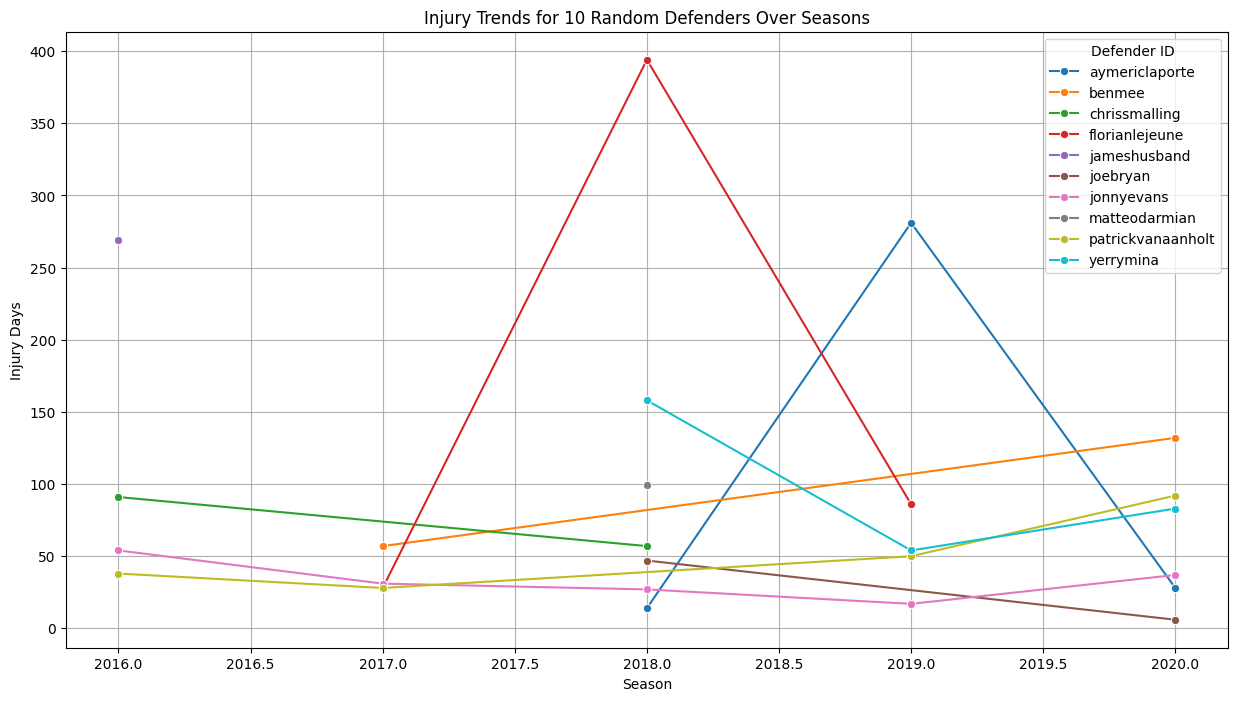

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=random_defenders_df, x='start_year', y='season_days_injured', hue='p_id2', marker='o')
plt.title('Injury Trends for 10 Random Defenders Over Seasons')
plt.xlabel('Season')
plt.ylabel('Injury Days')
plt.grid(True)
plt.legend(title='Defender ID')
plt.show()

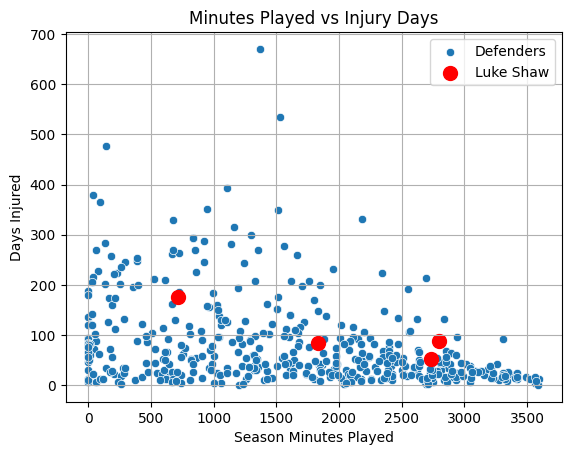

In [ ]:
# 3. Minutes played vs Injury Days
sns.scatterplot(data=defenders_df, x='season_minutes_played', y='season_days_injured', label='Defenders')
plt.scatter(luke_shaw_df['season_minutes_played'], luke_shaw_df['season_days_injured'],
            color='red', s=100, label='Luke Shaw')
plt.title('Minutes Played vs Injury Days')
plt.xlabel('Season Minutes Played')
plt.ylabel('Days Injured')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from xgboost import XGBRegressor
# --- ML Prediction Using XGBoost ---

features = ['age', 'height_cm', 'weight_kg', 'season_minutes_played',
            'bmi', 'work_rate_numeric', 'position_numeric']
train_df = defenders_df.dropna(subset=features + ['season_days_injured'])
X = train_df[features]
y = train_df['season_days_injured']

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict for Luke Shaw
if not luke_shaw_df[features].isnull().values.any():
    shaw_pred = model.predict(luke_shaw_df[features])[0]
    print(f"🔮 Predicted injury length for Luke Shaw (XGBoost): {shaw_pred:.1f} days")
else:
    print("⚠️ Cannot predict — missing features for Luke Shaw.")

🔮 Predicted injury length for Luke Shaw (XGBoost): 102.8 days


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
# Evaluate model (optional)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_pred = model.predict(X_test)
print(f"📉 MAE: {mean_absolute_error(y_test, y_pred):.2f} days")
print(f"📈 R² Score: {r2_score(y_test, y_pred):.3f}")

📉 MAE: 26.23 days
📈 R² Score: 0.735
